Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
# YOUR CODE GOES HERE
df = {'transactions': transactions, 'items':items,'item_categories':item_categories, 'shops':shops}
for k, v in df.items():
    print('\'{}\' shape:{}' .format(k, v.shape) )

'transactions' shape:(2935849, 6)
'items' shape:(22170, 3)
'item_categories' shape:(84, 2)
'shops' shape:(60, 2)


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [5]:
items.head(2)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76


In [6]:
transactions.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0


In [7]:

transactions["dates"] = pd.to_datetime(transactions["date"], format="%d.%m.%Y")

df_sep_2014 = transactions.where((transactions["dates"].dt.year == 2014) & (transactions["dates"].dt.month == 9))

df_sep_2014["revenue"] = df_sep_2014["item_price"] * df_sep_2014["item_cnt_day"]

m = df_sep_2014.groupby("shop_id")["revenue"].sum().max()

In [8]:
print(m)

7982852.2


In [9]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,dates
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15


In [10]:
# YOUR CODE GOES HERE

max_revenue = m # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [11]:
df_summer_2014 = transactions[(transactions["dates"].dt.year == 2014) & (transactions["dates"].dt.month >=  6) & (transactions["dates"].dt.month <= 8) ]
df_summer_2014.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,dates
1705909,15.06.2014,17,26,9532,399.00,1.0,2014-06-15
1705910,10.06.2014,17,26,9507,149.00,1.0,2014-06-10
1705911,13.06.2014,17,26,9509,246.32,1.0,2014-06-13
1705912,03.06.2014,17,26,9532,399.00,1.0,2014-06-03
1705913,08.06.2014,17,26,9532,399.00,1.0,2014-06-08


In [12]:
items.head(3)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40


In [13]:
df_summer_2014_wi_itemCtgrID = df_summer_2014.merge(items, on= 'item_id' )
df_summer_2014_wi_itemCtgrID

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,dates,item_name,item_category_id
0,15.06.2014,17,26,9532,399.00,1.0,2014-06-15,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
1,03.06.2014,17,26,9532,399.00,1.0,2014-06-03,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
2,08.06.2014,17,26,9532,399.00,1.0,2014-06-08,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
3,11.06.2014,17,26,9532,399.00,1.0,2014-06-11,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
4,19.06.2014,17,26,9532,399.00,1.0,2014-06-19,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
5,20.06.2014,17,26,9532,399.00,1.0,2014-06-20,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
6,17.06.2014,17,26,9532,399.00,1.0,2014-06-17,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
7,21.06.2014,17,27,9532,399.00,1.0,2014-06-21,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
8,28.06.2014,17,27,9532,399.00,3.0,2014-06-28,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
9,02.06.2014,17,27,9532,399.00,1.0,2014-06-02,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30


In [14]:
df_summer_2014_wi_itemCtgrID["revenue"] = df_summer_2014_wi_itemCtgrID["item_price"] * df_summer_2014_wi_itemCtgrID["item_cnt_day"]
df_summer_2014_wi_itemCtgrID.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,dates,item_name,item_category_id,revenue
0,15.06.2014,17,26,9532,399.0,1.0,2014-06-15,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30,399.0
1,03.06.2014,17,26,9532,399.0,1.0,2014-06-03,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30,399.0
2,08.06.2014,17,26,9532,399.0,1.0,2014-06-08,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30,399.0
3,11.06.2014,17,26,9532,399.0,1.0,2014-06-11,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30,399.0
4,19.06.2014,17,26,9532,399.0,1.0,2014-06-19,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30,399.0


In [15]:
df_summer_2014_wi_itemCtgrID.groupby('item_category_id')['revenue'].sum().head(5)

item_category_id
2    2755520.0
3    6854669.8
4      38833.2
5     418233.1
6    3360382.5
Name: revenue, dtype: float64

In [16]:
df_summer_2014_wi_itemCtgrID.groupby('item_category_id')['revenue'].sum().argmax()

20

In [17]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = 20 # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [18]:
transactions.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,dates
0,02.01.2013,0,59,22154,999.0,1.0,2013-01-02
1,03.01.2013,0,25,2552,899.0,1.0,2013-01-03
2,05.01.2013,0,25,2552,899.0,-1.0,2013-01-05


In [19]:
((transactions.groupby('item_id')['item_price'].max() - transactions.groupby('item_id')['item_price'].min()) == 0).sum()

5926

In [20]:
# YOUR CODE GOES HERE

num_items_constant_price = 5926  # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.         

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

In [21]:
df_Dec_2014_ShopId25 =  transactions[(transactions['dates'].dt.year == 2014) & (transactions['dates'].dt.month == 12) & (transactions['shop_id'] == 25)]
df_Dec_2014_ShopId25.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,dates
2295837,14.12.2014,23,25,21752,399.0,1.0,2014-12-14
2295838,13.12.2014,23,25,21752,399.0,3.0,2014-12-13
2295839,26.12.2014,23,25,21733,149.0,1.0,2014-12-26


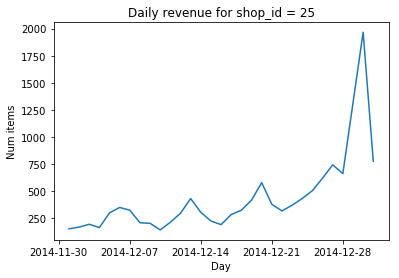

Current answer for task total_num_items_sold_var is: 117167.702299


In [22]:
shop_id = 25

total_num_items_sold = df_Dec_2014_ShopId25.groupby('dates')['item_cnt_day'].sum() # YOUR CODE GOES HERE
days = df_Dec_2014_ShopId25.groupby('dates')['item_cnt_day'].sum().index # YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var =df_Dec_2014_ShopId25.groupby('dates')['item_cnt_day'].sum().var() # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [23]:
STUDENT_EMAIL = 'wsdgh@qq.com'# EMAIL HERE
STUDENT_TOKEN = 'E0qjZtAw2jO61KWj'# TOKEN HERE
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.702299


In [24]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)